# Implementing gradient descent

In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np

np.random.seed(1)  # for reproducible results

In [4]:
N = 100  # Number of samples
X = 5 * np.random.rand(N, 1)  # Feature vectors
y = 2 * X + 1 + np.random.randn(N, 1)  # Labels (slope = 2, intercept = 1)

X_b = np.c_[X, np.ones((N, 1))]  # Append 1 to each feature vector

In [5]:
# Gradient descent
eta = 0.1  # learning rate
n_iters = 1000  # Number of iterations

theta = np.random.randn(2, 1)  # Random initialization of weights

for i in range(n_iters):
    grad_loss = 2 / N * X_b.T @ (X_b @ theta - y)
    theta -= eta * grad_loss

In [6]:
print(f"theta: {theta}")

theta: [[1.93698502]
 [1.23695725]]


In [7]:
theta

array([[1.93698502],
       [1.23695725]])

We can do better by checking the difference between iterations

In [8]:
# Gradient descent
eta = 0.1  # learning rate
n_iters = 1000  # Number of iterations

theta = np.random.randn(2, 1)  # Random initialization of weights

# Gradient descent loop
for iteration in range(n_iters):
    # Calculate gradient of the loss function
    grad_loss = (2 / N) * X_b.T @ (X_b @ theta - y)

    # Update theta
    new_theta = theta - eta * grad_loss

    # Check for convergence (change in theta is below tolerance)
    if np.linalg.norm(new_theta - theta, ord=2) < 0.001:
        print(f"Converged after {iteration + 1} iterations.")
        break

    # Update theta
    theta = new_theta

print("theta: ", theta)

Converged after 84 iterations.
theta:  [[1.94277377]
 [1.21831623]]


### Let's try to implement mini-batch gradient descent

In [9]:
eta_0, eta_1 = 0.1, 0.01  # Learning rate scheduler


def lr(t):
    return (1 - t) * eta_0 + t * eta_1


theta = np.random.randn(2, 1)

epochs = 50
batch_size = 10
batches_per_epoch = np.int32(N / batch_size)

for epoch in range(epochs):
    for iteration in range(batches_per_epoch):
        idx = np.random.choice(N, size=batch_size, replace=False)
        xt, yt = X_b[idx], y[idx]
        grad_loss = (2 / N) * xt.T @ (xt @ theta - yt)
        eta = lr((epoch * batches_per_epoch + 1) / (epochs * batches_per_epoch))
        theta -= eta * grad_loss

print(theta)

[[2.00716333]
 [1.0028002 ]]


# Introduction to Keras and Tensorflow

## Classification problem

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [11]:
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Build a neural network model
inp = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(16, activation="relu")(inp)
x = tf.keras.layers.Dense(16, activation="relu")(x)
out = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Define the model
model = tf.keras.Model(inp, out)

# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(curve="ROC"),
    ],
)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=20)

model.summary()  # Print the model's summary

y_pred_prob = model.predict(X_test)  # Predict probabilities for the test set
y_pred = np.round(y_pred_prob)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"\nThe accuracy score of the prediction is: {accuracy}")
print(f"\nThe recall score of the prediction is: {recall:.2f}")
print(f"\nThe precision score of the prediction is: {precision:.2f}")

Epoch 1/20
45/45 [==============================] - 0s 4ms/step - loss: 0.7135 - accuracy: 0.5014 - precision: 0.5000 - recall: 0.4373 - auc: 0.4704 - val_loss: 0.6593 - val_accuracy: 0.6875 - val_precision: 0.7609 - val_recall: 0.7143 - val_auc: 0.6899
Epoch 2/20
45/45 [==============================] - 0s 900us/step - loss: 0.6042 - accuracy: 0.8111 - precision: 0.7958 - recall: 0.8357 - auc: 0.8668 - val_loss: 0.5846 - val_accuracy: 0.7750 - val_precision: 0.8163 - val_recall: 0.8163 - val_auc: 0.8107
Epoch 3/20
45/45 [==============================] - 0s 849us/step - loss: 0.5134 - accuracy: 0.8375 - precision: 0.8184 - recall: 0.8663 - auc: 0.9172 - val_loss: 0.5234 - val_accuracy: 0.8125 - val_precision: 0.8400 - val_recall: 0.8571 - val_auc: 0.8223
Epoch 4/20
45/45 [==============================] - 0s 881us/step - loss: 0.4310 - accuracy: 0.8403 - precision: 0.8161 - recall: 0.8774 - auc: 0.9226 - val_loss: 0.4820 - val_accuracy: 0.8250 - val_precision: 0.8431 - val_recall: 0.8

In [12]:
# Visualize the model's training progress using the stats stored in the history object
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,accuracy,precision,recall,auc,val_loss,val_accuracy,val_precision,val_recall,val_auc,epoch
15,0.307887,0.875000,0.851175,0.908078,0.941597,0.457764,0.85,0.862745,0.897959,0.858130,15
16,0.307132,0.876389,0.855263,0.905292,0.941824,0.454702,0.85,0.862745,0.897959,0.860105,16
17,0.306851,0.873611,0.848958,0.908078,0.941554,0.455455,0.85,0.862745,0.897959,0.862080,17
18,0.305517,0.876389,0.853403,0.908078,0.942091,0.453351,0.85,0.862745,0.897959,0.861422,18
19,0.304293,0.875000,0.853018,0.905292,0.942727,0.455651,0.85,0.862745,0.897959,0.862409,19


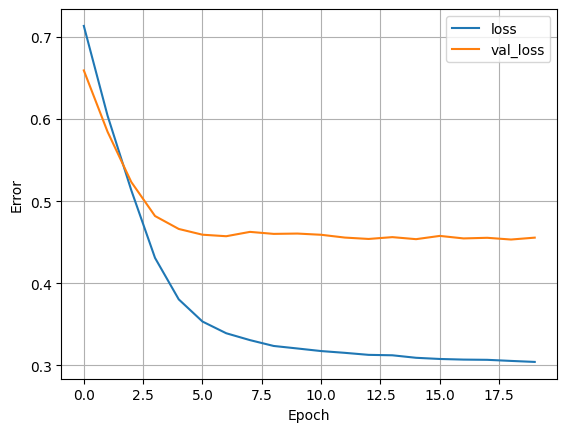

In [13]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)


plot_loss(history)

## Regression problem

In [14]:
# Import necessary libraries
import tensorflow as tf
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [28]:
# Generate synthetic dataset for regression prediction
X, y = make_regression(n_samples=1000, n_features=4, n_targets=1, random_state=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Build neural network model
inp = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(16, activation="relu")(inp)
x = tf.keras.layers.Dense(16, activation="relu")(x)
out = tf.keras.layers.Dense(1, activation="linear")(x)

# Define the model
model = tf.keras.Model(inp, out)

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=16, epochs=200)

# Print model summary
model.summary()

# Predict values for the test holdout set
y_pred = model.predict(X_test)

R2Score = r2_score(y_test, y_pred)
print(f"R2 Score is approx. : {R2Score:.3f}")

Epoch 1/200
40/40 [==============================] - 0s 2ms/step - loss: 21153.1699 - mse: 21153.1699 - val_loss: 17591.7227 - val_mse: 17591.7227
Epoch 2/200
40/40 [==============================] - 0s 902us/step - loss: 21069.6758 - mse: 21069.6758 - val_loss: 17509.4414 - val_mse: 17509.4414
Epoch 3/200
40/40 [==============================] - 0s 845us/step - loss: 20946.0488 - mse: 20946.0488 - val_loss: 17371.4727 - val_mse: 17371.4727
Epoch 4/200
40/40 [==============================] - 0s 822us/step - loss: 20725.4219 - mse: 20725.4219 - val_loss: 17129.7969 - val_mse: 17129.7969
Epoch 5/200
40/40 [==============================] - 0s 794us/step - loss: 20341.3594 - mse: 20341.3594 - val_loss: 16710.7676 - val_mse: 16710.7676
Epoch 6/200
40/40 [==============================] - 0s 798us/step - loss: 19697.1660 - mse: 19697.1660 - val_loss: 16036.9561 - val_mse: 16036.9561
Epoch 7/200
40/40 [==============================] - 0s 801us/step - loss: 18704.9629 - mse: 18704.9629 - va

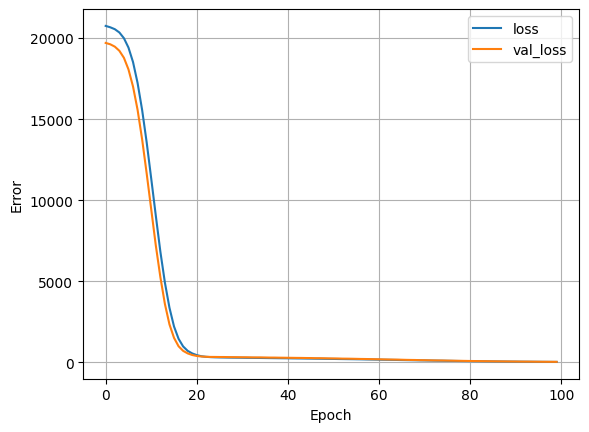

In [24]:


plot_loss(history)